In [1]:
import numpy as np
from scipy.constants import R, Avogadro
import matplotlib.pyplot as plt
from scipy import integrate

# Load data from the text file
data = np.loadtxt('exoplanet_data.txt', skiprows=12)

g=20

# Separate each column into a NumPy array
probe_number = data[:, 0]
pressure = data[:, 1]
temperature = data[:, 2]
air_density = data[:, 3]
n2_density_molecules = data[:, 4]
he_density_molecules = data[:, 5]
ar_density_molecules = data[:, 6]
co2_density_molecules = data[:, 7]
altitude = data[:, 8]

probe1 = np.where(probe_number==1)[0]
probe2 = np.where(probe_number==2)[0]
probe3 = np.where(probe_number==3)[0]
probe4 = np.where(probe_number==4)[0]
probe5 = np.where(probe_number==5)[0]
probe1_start = np.where(probe_number==1)[0][0]
probe1_end = np.where(probe_number==1)[0][-1]
probe2_start = np.where(probe_number==2)[0][0]
probe2_end = np.where(probe_number==2)[0][-1]
probe3_start = np.where(probe_number==3)[0][0]
probe3_end = np.where(probe_number==3)[0][-1]
probe4_start = np.where(probe_number==4)[0][0]
probe4_end = np.where(probe_number==4)[0][-1]
probe5_start = np.where(probe_number==5)[0][0]
probe5_end = np.where(probe_number==5)[0][-1]

print('Probe 1 index from '+str(probe1_start)+' to '+str(probe1_end))
print('Probe 2 index from '+str(probe2_start)+' to '+str(probe2_end))
print('Probe 3 index from '+str(probe3_start)+' to '+str(probe3_end))
print('Probe 4 index from '+str(probe4_start)+' to '+str(probe4_end))
print('Probe 5 index from '+str(probe5_start)+' to '+str(probe5_end))

Probe 1 index from 0 to 900
Probe 2 index from 901 to 1801
Probe 3 index from 1802 to 2702
Probe 4 index from 2703 to 3603
Probe 5 index from 3604 to 4504


In [2]:
n2_density_kg = n2_density_molecules*(10**22)*28.0134/(1000*Avogadro)
he_density_kg = he_density_molecules*(10**22)*4.002602/(1000*Avogadro)
ar_density_kg = ar_density_molecules*(10**22)*39.948/(1000*Avogadro)
co2_density_kg = co2_density_molecules*(10**22)*44.01/(1000*Avogadro)

print('n2 density = '+str(n2_density_kg))
print('\nhe density = '+str(he_density_kg))
print('\nar density = '+str(ar_density_kg))
print('\nco2 density = '+str(co2_density_kg))

n2_fraction=n2_density_kg/air_density
he_fraction=he_density_kg/air_density
ar_fraction=ar_density_kg/air_density
co2_fraction=co2_density_kg/air_density

print('\n\nn2 fraction = '+str(n2_fraction))
print('\nhe fraction = '+str(he_fraction))
print('\nar fraction = '+str(ar_fraction))
print('\nco2 fraction = '+str(co2_fraction))

vapour_density = air_density - n2_density_kg - he_density_kg - ar_density_kg - co2_density_kg
specific_humidity=vapour_density/air_density
mix_molar_mass = 1/((n2_fraction / 28) + (he_fraction / 4) + (ar_fraction / 40) + (co2_fraction / 44) + (specific_humidity / 18))

print('\n\nvapour density: '+str(vapour_density))
print('\nspecific humidity: '+str(specific_humidity))
print('\nmix molar mass: '+str(mix_molar_mass))

n2 density = [0.07959582920808383 0.08014938561482579 0.08069829028705733 ...
 0.42519644466098466 0.4254848522006317 0.4257732597402788]

he density = [0.021516639964091446 0.021665521048697643 0.021814402133303844 ...
 0.11493686196368484 0.11501529039218275 0.11509371882068066]

ar density = [0.032212380236691776 0.032437919966520345 0.032656826174883365 ...
 0.17206691329479984 0.17218631668117967 0.1723057200675595]

co2 density = [0.08172572671649077 0.08229575324639207 0.08285847174385874 ...
 0.436574549612487 0.43687417894230685 0.4371738082721268]


n2 fraction = [0.3700410469924864 0.37005118248684515 0.3700398490785828 ...
 0.3631705469477743 0.3631687298463044 0.3631669152246938]

he fraction = [0.10003086919614805 0.10003010780136498 0.10002935681082101 ...
 0.09817034819539357 0.0981702561409561 0.0981701642121484]

ar fraction = [0.14975537069591713 0.14976647105831453 0.14974700190243656 ...
 0.14696650406545994 0.14696806620164024 0.1469696262059208]

co2 fraction = [

[ 150.   151.5  153.  ... 1497.  1498.5 1500. ]
dp_dz: [ -4.34782609  -4.37317784  -4.40528634 ... -23.4375     -23.4375
 -23.4375    ]

equilibium: [1.0045148529113552 1.0034971611898118 1.0040394265931418 ...
 1.0024215124182174 1.0017495313397544 1.0010421983988322]

uncertainty in slope :0.1006317969957905



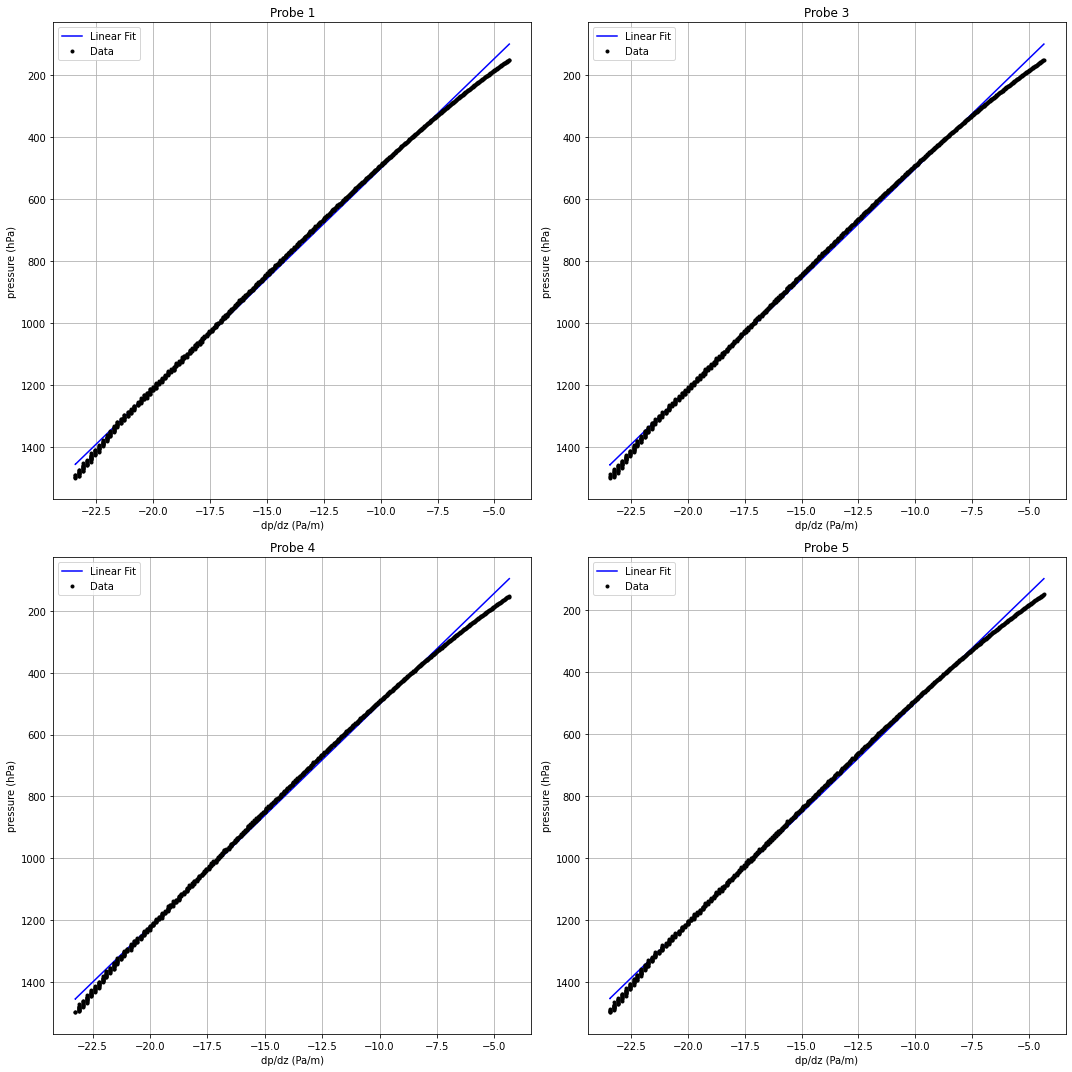

In [3]:
print(pressure)

delta_altitude = altitude[2:] - altitude[:-2]
delta_pressure = pressure[2:] - pressure[:-2]
dp_dz = (delta_pressure*(10**2)) / delta_altitude

equilibrium=-dp_dz*R*temperature[1:-1]/(mix_molar_mass[1:-1]/1000*pressure[1:-1]*(10**2)*20)

plt.figure(figsize=(15, 15))  # Set the figure size

slope, intercept = np.polyfit(dp_dz[:899], pressure[1:900], 1)
fit_line = slope * dp_dz[:899] + intercept
residuals = pressure[1:900] - (slope * dp_dz[:899] + intercept)
std_error_slope = np.sqrt(np.sum(residuals**2) / (len(dp_dz[:899]) - 2)) / np.sqrt(np.sum((dp_dz[:899] - np.mean(dp_dz[:899]))**2))
print('uncertainty in slope :'+str(std_error_slope)+'\n')

plt.subplot(2, 2, 1)
plt.plot(dp_dz[:899], fit_line, color='blue', label='Linear Fit')
plt.plot(dp_dz[:899], pressure[1:900],'.',color='black', label='Data')
plt.xlabel('dp/dz (Pa/m)')
plt.ylabel('pressure (hPa)')
plt.title('Probe 1')
plt.grid()
plt.legend()
plt.gca().invert_yaxis()


slope, intercept = np.polyfit(dp_dz[1802:2701], pressure[1803:2702], 1)
fit_line = slope * dp_dz[1802:2701] + intercept

plt.subplot(2, 2, 2)
plt.plot(dp_dz[1802:2701], fit_line, color='blue', label='Linear Fit')
plt.plot(dp_dz[1802:2701], pressure[1803:2702],'.',color='black', label='Data')
plt.xlabel('dp/dz (Pa/m)')
plt.ylabel('pressure (hPa)')
plt.title('Probe 3')
plt.grid()
plt.legend()
plt.gca().invert_yaxis()


slope, intercept = np.polyfit(dp_dz[2703:3602], pressure[2703:3602], 1)
fit_line = slope * dp_dz[2703:3602] + intercept

plt.subplot(2, 2, 3)
plt.plot(dp_dz[2703:3602], fit_line, color='blue', label='Linear Fit')
plt.plot(dp_dz[2703:3602], pressure[2704:3603],'.',color='black', label='Data')
plt.xlabel('dp/dz (Pa/m)')
plt.ylabel('pressure (hPa)')
plt.title('Probe 4')
plt.grid()
plt.legend()
plt.gca().invert_yaxis()


slope, intercept = np.polyfit(dp_dz[3604:4503], pressure[3604:4503], 1)
fit_line = slope * dp_dz[3604:4503] + intercept

plt.subplot(2, 2, 4)
plt.plot(dp_dz[3604:4503], fit_line, color='blue', label='Linear Fit')
plt.plot(dp_dz[3604:4503], pressure[3604:4503],'.',color='black', label='Data')
plt.xlabel('dp/dz (Pa/m)')
plt.ylabel('pressure (hPa)')
plt.title('Probe 5')
plt.grid()
plt.legend()
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

First 10 T values: [165.6004230072166 166.27024443444495 166.6784273191152 167.05815033929943
 167.66657020608622 168.25433639594462 168.82828726500537
 169.12403508267494 169.65259138895118 170.16025138370338]



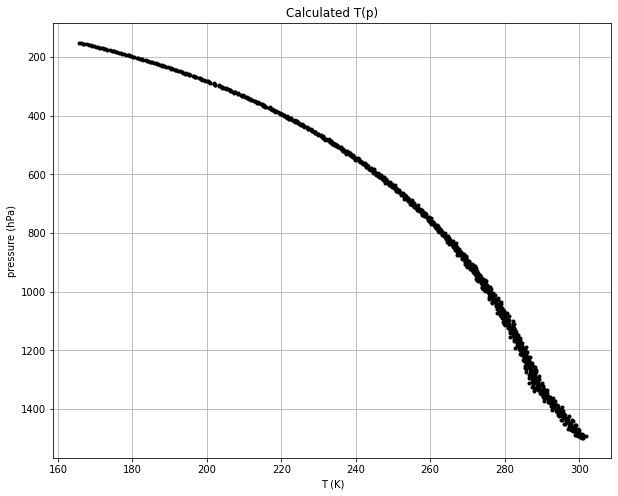

In [4]:
T=-mix_molar_mass[902:1801]*pressure[902:1801]*(10**2)*20/(1000*R*dp_dz[901:1800])

plt.figure(figsize=(10, 8))  # Set the figure size
plt.plot(T, pressure[902:1801],'.',color='black')

# Add labels and title
plt.xlabel('T (K)')
plt.ylabel('pressure (hPa)')
plt.title('Calculated T(p)')

plt.gca().invert_yaxis()

# Show plot
plt.grid()
plt.show()

In [5]:
dp = np.diff(pressure*(10**2))

avg_q = (specific_humidity[:-1] + specific_humidity[1:]) / 2

p1_vapour_per_area = np.sum(avg_q[probe1_start:probe1_end] * dp[probe1_start:probe1_end])/20
p2_vapour_per_area = np.sum(avg_q[probe2_start:probe2_end] * dp[probe2_start:probe2_end])/20
p3_vapour_per_area = np.sum(avg_q[probe3_start:probe3_end] * dp[probe3_start:probe3_end])/20
p4_vapour_per_area = np.sum(avg_q[probe4_start:probe4_end] * dp[probe4_start:probe4_end])/20
p5_vapour_per_area = np.sum(avg_q[probe5_start:probe5_end] * dp[probe5_start:probe5_end])/20

print(f'Probe 1: M = {p1_vapour_per_area:.5f}'+'kg/m^2')
print(f'Probe 2: M = {p2_vapour_per_area:.5f}'+'kg/m^2')
print(f'Probe 3: M = {p3_vapour_per_area:.5f}'+'kg/m^2')
print(f'Probe 4: M = {p4_vapour_per_area:.5f}'+'kg/m^2')
print(f'Probe 5: M = {p5_vapour_per_area:.5f}'+'kg/m^2')

print(f"\nProbe 1: Depth = {p1_vapour_per_area/10:.5f}"+'cm')
print(f"Probe 2: Depth = {p2_vapour_per_area/10:.5f}"+'cm')
print(f"Probe 3: Depth = {p3_vapour_per_area/10:.5f}"+'cm')
print(f"Probe 4: Depth = {p4_vapour_per_area/10:.5f}"+'cm')
print(f"Probe 5: Depth = {p5_vapour_per_area/10:.5f}"+'cm')

Probe 1: M = 41.45512kg/m^2
Probe 2: M = 36.22025kg/m^2
Probe 3: M = 42.15234kg/m^2
Probe 4: M = 47.51804kg/m^2
Probe 5: M = 40.84014kg/m^2

Probe 1: Depth = 4.14551cm
Probe 2: Depth = 3.62202cm
Probe 3: Depth = 4.21523cm
Probe 4: Depth = 4.75180cm
Probe 5: Depth = 4.08401cm


es(T): [6.01097897e-03 6.57738093e-03 7.18061878e-03 ... 3.67666687e+03
 3.69419836e+03 3.71376359e+03]

e: [3.785851663981487 3.1825241684112155 4.008184906000724 ...
 3086.4722257537614 3089.369156283899 3092.3690781369837]

RH: [62982.28098249709 48385.8880004655 55819.49175368859 ...
 83.94756277555635 83.62759257117229 83.26779574920869]



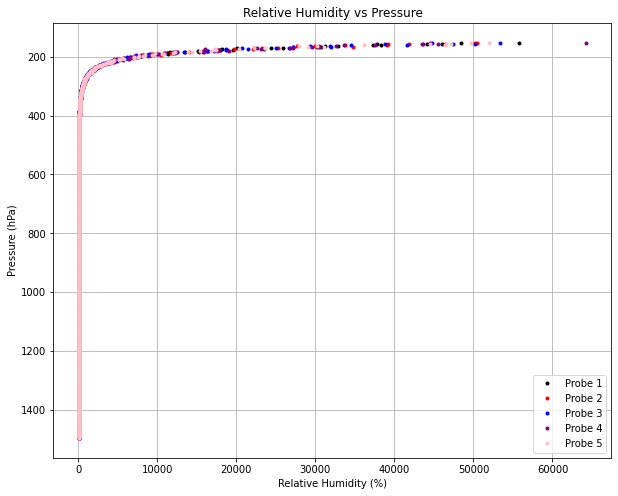

In [6]:
temperature[901:1800]=T
temperature[1801]=T[-1]

m=18/1000
L=2.25e6
es=611*np.exp(m*L*((1/273)-(1/temperature))/R)

e=vapour_density*8.314*temperature/(18/1000)

RH = (e / es)*100

print('es(T): '+str(es))
print('\ne: '+str(e))
print('\nRH: '+str(RH)+'\n')

# Plot relative humidity
plt.figure(figsize=(10, 8))
plt.plot(RH[probe1_start+1:probe1_end-1], pressure[probe1_start+1:probe1_end-1], '.', color='black', label='Probe 1')
plt.plot(RH[probe2_start+1:probe2_end-1], pressure[probe2_start+1:probe2_end-1], '.', color='red', label='Probe 2')
plt.plot(RH[probe3_start+1:probe3_end-1], pressure[probe3_start+1:probe3_end-1], '.', color='blue', label='Probe 3')
plt.plot(RH[probe4_start+1:probe4_end-1], pressure[probe4_start+1:probe4_end-1], '.', color='purple', label='Probe 4')
plt.plot(RH[probe5_start+1:probe5_end-1], pressure[probe5_start+1:probe5_end-1], '.', color='pink', label='Probe 5')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Pressure (hPa)')
plt.title('Relative Humidity vs Pressure')
plt.gca().invert_yaxis()
plt.legend()
plt.grid()
plt.show()

Probe 1: M = 4.14551kg/m
Probe 2: M = 3.62202kg/m
Probe 3: M = 4.21523kg/m
Probe 4: M = 4.75180kg/m
Probe 5: M = 4.08401kg/m

Probe 1: Depth = 4.14551cm
Probe 2: Depth = 3.62202cm
Probe 3: Depth = 4.21523cm
Probe 4: Depth = 4.75180cm
Probe 5: Depth = 4.08401cm



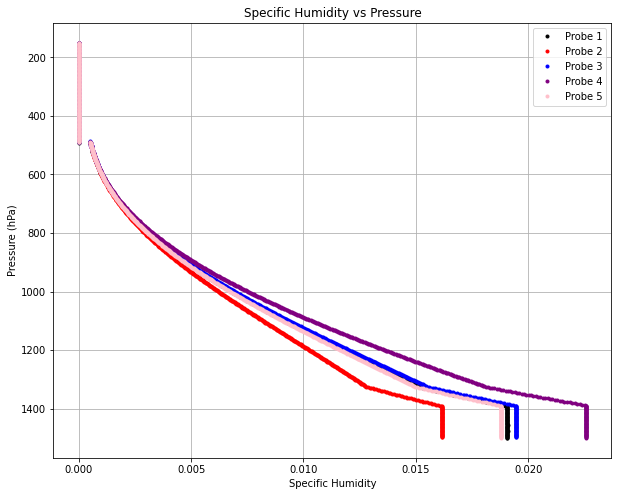

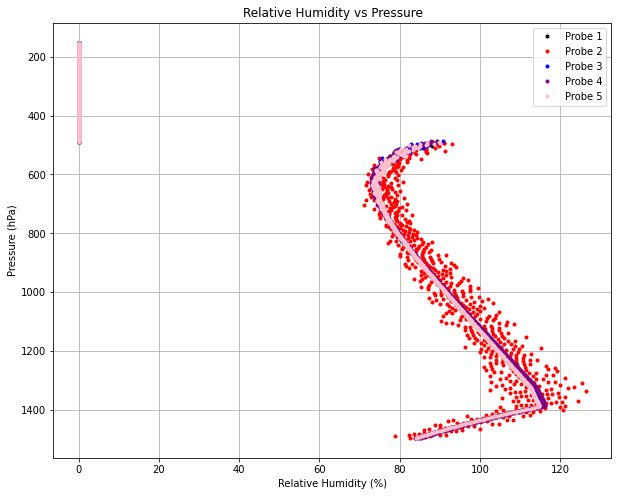

In [7]:
dp = np.diff(pressure*(10**2))

avg_q = (specific_humidity[:-1] + specific_humidity[1:]) / 2

p1_vapour_per_area = np.sum(avg_q[probe1_start:probe1_end] * dp[probe1_start:probe1_end])/20
p2_vapour_per_area = np.sum(avg_q[probe2_start:probe2_end] * dp[probe2_start:probe2_end])/20
p3_vapour_per_area = np.sum(avg_q[probe3_start:probe3_end] * dp[probe3_start:probe3_end])/20
p4_vapour_per_area = np.sum(avg_q[probe4_start:probe4_end] * dp[probe4_start:probe4_end])/20
p5_vapour_per_area = np.sum(avg_q[probe5_start:probe5_end] * dp[probe5_start:probe5_end])/20

print(f'Probe 1: M = {p1_vapour_per_area/10:.5f}'+'kg/m')
print(f'Probe 2: M = {p2_vapour_per_area/10:.5f}'+'kg/m')
print(f'Probe 3: M = {p3_vapour_per_area/10:.5f}'+'kg/m')
print(f'Probe 4: M = {p4_vapour_per_area/10:.5f}'+'kg/m')
print(f'Probe 5: M = {p5_vapour_per_area/10:.5f}'+'kg/m')

print(f"\nProbe 1: Depth = {p1_vapour_per_area/10:.5f}"+'cm')
print(f"Probe 2: Depth = {p2_vapour_per_area/10:.5f}"+'cm')
print(f"Probe 3: Depth = {p3_vapour_per_area/10:.5f}"+'cm')
print(f"Probe 4: Depth = {p4_vapour_per_area/10:.5f}"+'cm')
print(f"Probe 5: Depth = {p5_vapour_per_area/10:.5f}"+'cm\n')

qd=0.0005

for i in range(len(vapour_density)):
    if (specific_humidity[i]<qd):
        vapour_density[i]=0
        specific_humidity[i]=0

e=vapour_density*8.314*temperature/(18/1000)

RH = (e / es)*100

plt.figure(figsize=(10, 8))
plt.plot(specific_humidity[:900], pressure[1:901], '.', color='black', label='Probe 1')
plt.plot(specific_humidity[901:1800], pressure[901:1800], '.', color='red', label='Probe 2')
plt.plot(specific_humidity[1802:2701], pressure[1802:2701], '.', color='blue', label='Probe 3')
plt.plot(specific_humidity[2704:3603], pressure[2704:3603], '.', color='purple', label='Probe 4')
plt.plot(specific_humidity[3604:4504], pressure[3604:4504], '.', color='pink', label='Probe 5')
plt.xlabel('Specific Humidity')
plt.ylabel('Pressure (hPa)')
plt.title('Specific Humidity vs Pressure')
plt.gca().invert_yaxis()
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(RH[probe1_start+1:probe1_end-1], pressure[probe1_start+1:probe1_end-1], '.', color='black', label='Probe 1')
plt.plot(RH[probe2_start+1:probe2_end-1], pressure[probe2_start+1:probe2_end-1], '.', color='red', label='Probe 2')
plt.plot(RH[probe3_start+1:probe3_end-1], pressure[probe3_start+1:probe3_end-1], '.', color='blue', label='Probe 3')
plt.plot(RH[probe4_start+1:probe4_end-1], pressure[probe4_start+1:probe4_end-1], '.', color='purple', label='Probe 4')
plt.plot(RH[probe5_start+1:probe5_end-1], pressure[probe5_start+1:probe5_end-1], '.', color='pink', label='Probe 5')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Pressure (hPa)')
plt.title('Relative Humidity vs Pressure')
plt.gca().invert_yaxis()
plt.legend()
plt.grid()
plt.show()

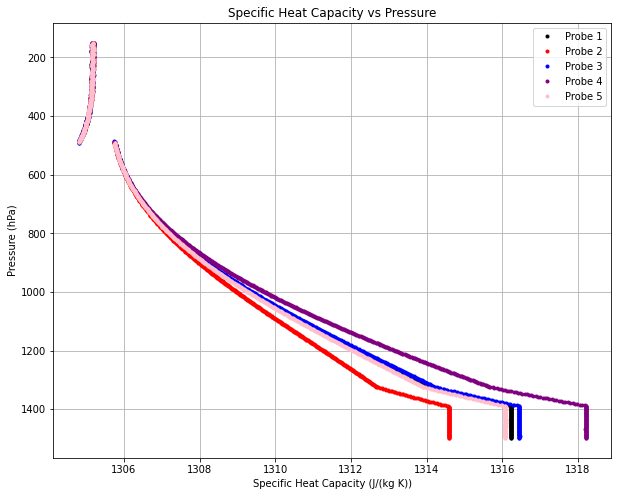

In [8]:
Cp_co2=850
Cp_h20=1870
Cp_n2=(7/2)*R/(28/1000)
Cp_he=(5/2)*R/(4/1000)
Cp_ar=(5/2)*R/(40/1000)
Cp=specific_humidity*Cp_h20 + Cp_co2*co2_fraction + Cp_n2 * n2_fraction + Cp_he*he_fraction + Cp_ar*ar_fraction

plt.figure(figsize=(10, 8))
plt.plot(Cp[probe1_start:probe1_end], pressure[probe1_start:probe1_end], '.', color='black', label='Probe 1')
plt.plot(Cp[probe2_start:probe2_end], pressure[probe2_start:probe2_end], '.', color='red', label='Probe 2')
plt.plot(Cp[probe3_start:probe3_end], pressure[probe3_start:probe3_end], '.', color='blue', label='Probe 3')
plt.plot(Cp[probe4_start:probe4_end], pressure[probe4_start:probe4_end], '.', color='purple', label='Probe 4')
plt.plot(Cp[probe5_start:probe5_end], pressure[probe5_start:probe5_end], '.', color='pink', label='Probe 5')
plt.xlabel('Specific Heat Capacity (J/(kg K))')
plt.ylabel('Pressure (hPa)')
plt.title('Specific Heat Capacity vs Pressure')
plt.gca().invert_yaxis()
plt.legend()
plt.grid()
plt.show()

In [9]:
absorption_cross_section_H2O = 2e-27
absorption_cross_section_CO2 = 1.2e-28

vapour_density_molecules = vapour_density*1000*Avogadro/18

beta_CO2 = absorption_cross_section_CO2 * co2_density_molecules * 10**22
beta_H2O = absorption_cross_section_H2O * vapour_density_molecules

pressure_vals = [1250,750, 500, 350, 200]

probes = [probe1_start,probe2_start,probe3_start,probe4_start,probe5_start]

print("\n\033[1m" + "CO2" + "\033[0m")
for p in pressure_vals:
    print()
    for i in range(1,6):
        probe_indices = globals()[f"probe{i}"]
        indices = np.where(pressure[probe_indices] <= p)[0] + probes[i-1]
        integral_CO2 = np.trapz(beta_CO2[indices]/(air_density[indices]*20), pressure[indices]*100)
        print(f"Optical depth for probe{i} at {p}hPa: {integral_CO2:.4f}")

print("\n\n\033[1m" + "H2O" + "\033[0m")
for p in pressure_vals:
    print()
    for i in range(1,6):
        probe_indice = globals()[f"probe{i}"]
        indices = np.where(np.logical_and(pressure[probe_indice] <= p, vapour_density[probe_indice] != 0))[0] + probes[i-1]
        integral_H2O = np.trapz(beta_H2O[indices]/(air_density[indices]*20), pressure[indices]*100)
        print(f"Optical depth for probe{i} at {p}hPa: {integral_H2O:.4f}")
        
print("\n\n\033[1m" + "CO2+H2O" + "\033[0m")
for p in pressure_vals:
    print()
    for i in range(1,6):
        probe_indice = globals()[f"probe{i}"]
        
        indices = np.where(np.logical_and(pressure[probe_indice] <= p, vapour_density[probe_indice] != 0))[0] + probes[i-1]
        integral_H2O = np.trapz(beta_H2O[indices]/(air_density[indices]*20), pressure[indices]*100)
        
        indices = np.where(pressure[probe_indices] <= p)[0] + probes[i-1]
        integral_CO2 = np.trapz(beta_CO2[indices]/(air_density[indices]*20), pressure[indices]*100)
        
        integral = integral_H2O+integral_CO2
        if integral<0.00001:
            print(f"Optical depth for probe{i} at {p}hPa: {integral:.4e}")
        else:
            print(f"Optical depth for probe{i} at {p}hPa: {integral:.4f}")


CO2

Optical depth for probe1 at 1250hPa: 3.4181
Optical depth for probe2 at 1250hPa: 3.4193
Optical depth for probe3 at 1250hPa: 3.4179
Optical depth for probe4 at 1250hPa: 3.4168
Optical depth for probe5 at 1250hPa: 3.4183

Optical depth for probe1 at 750hPa: 1.8708
Optical depth for probe2 at 750hPa: 1.8708
Optical depth for probe3 at 750hPa: 1.8708
Optical depth for probe4 at 750hPa: 1.8707
Optical depth for probe5 at 750hPa: 1.8708

Optical depth for probe1 at 500hPa: 1.0902
Optical depth for probe2 at 500hPa: 1.0902
Optical depth for probe3 at 500hPa: 1.0902
Optical depth for probe4 at 500hPa: 1.0902
Optical depth for probe5 at 500hPa: 1.0902

Optical depth for probe1 at 350hPa: 0.6223
Optical depth for probe2 at 350hPa: 0.6223
Optical depth for probe3 at 350hPa: 0.6223
Optical depth for probe4 at 350hPa: 0.6223
Optical depth for probe5 at 350hPa: 0.6223

Optical depth for probe1 at 200hPa: 0.1544
Optical depth for probe2 at 200hPa: 0.1544
Optical depth for probe3 at 200hPa: 0.1

In [10]:
absorption_cross_section_H2O = 7.5e-29

beta_H2O = absorption_cross_section_H2O * vapour_density_molecules

pressure_vals = [450]

for p in pressure_vals:
    for i in range(1,6):
        probe_indice = globals()[f"probe{i}"]
        indices = np.where(np.logical_and(pressure[probe_indice] <= p, vapour_density[probe_indice] != 0))[0] + probes[i-1]
        integral_H2O = np.trapz(beta_H2O[indices]/(air_density[indices]*20), pressure[indices]*100)
        print(f"Optical depth for probe{i} at {p}hPa: {integral_H2O:.4e}")

print()
temp = temperature[np.where(pressure==450)]
for i in range(5):
    print(f"Temperature for probe{i+1} at 450hPa: {temp[i]:.2f}K")

Optical depth for probe1 at 450hPa: 0.0000e+00
Optical depth for probe2 at 450hPa: 0.0000e+00
Optical depth for probe3 at 450hPa: 0.0000e+00
Optical depth for probe4 at 450hPa: 0.0000e+00
Optical depth for probe5 at 450hPa: 0.0000e+00

Temperature for probe1 at 450hPa: 228.63K
Temperature for probe2 at 450hPa: 228.16K
Temperature for probe3 at 450hPa: 228.73K
Temperature for probe4 at 450hPa: 228.73K
Temperature for probe5 at 450hPa: 228.53K


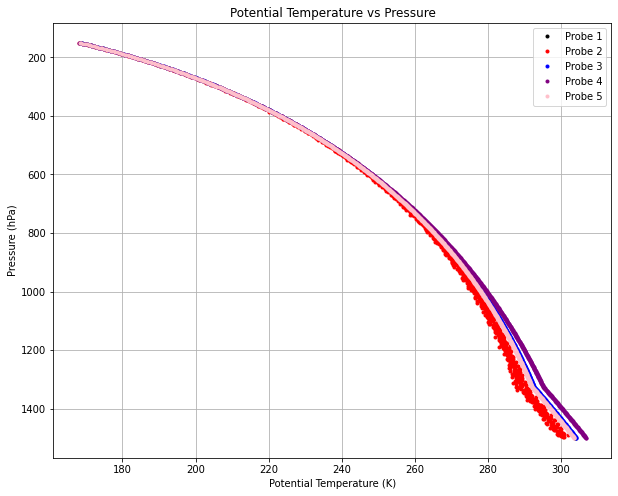

In [11]:
Cv=Cp-R
gamma = Cp/Cv
pr = pressure[probe1_end]
potential_temperature = temperature*(pr/pressure)**(1-(1/gamma))

plt.figure(figsize=(10, 8))
plt.plot(potential_temperature[probe1], pressure[probe1], '.', color='black', label='Probe 1')
plt.plot(potential_temperature[probe2[:-2]], pressure[probe2[:-2]], '.', color='red', label='Probe 2')
plt.plot(potential_temperature[probe3], pressure[probe3], '.', color='blue', label='Probe 3')
plt.plot(potential_temperature[probe4], pressure[probe4], '.', color='purple', label='Probe 4')
plt.plot(potential_temperature[probe5], pressure[probe5], '.', color='pink', label='Probe 5')
plt.xlabel('Potential Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Potential Temperature vs Pressure')
plt.gca().invert_yaxis()
plt.legend()
plt.grid()

[15.323635003908253 15.323309836452527 15.323769383332914 ...
 15.19661810713003 15.196641822931266 15.196665506440626]


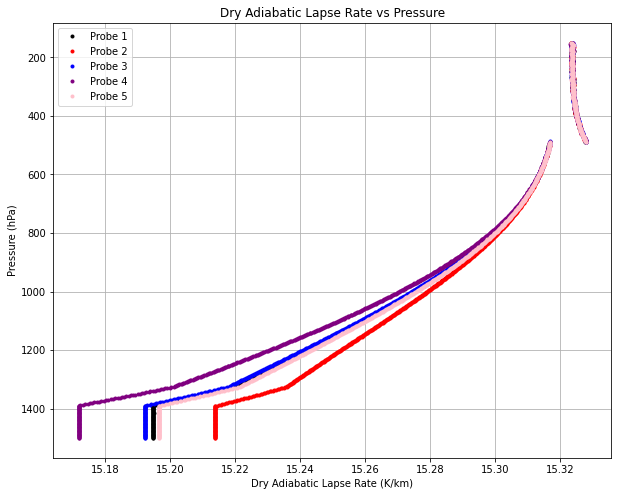

In [12]:
# Dry adiabatic lapse rate
da_lapse_rate = 1000*g/Cp

print(da_lapse_rate)

plt.figure(figsize=(10, 8))
plt.plot(da_lapse_rate[probe1], pressure[probe1], '.', color='black', label='Probe 1')
plt.plot(da_lapse_rate[probe2], pressure[probe2], '.', color='red', label='Probe 2')
plt.plot(da_lapse_rate[probe3], pressure[probe3], '.', color='blue', label='Probe 3')
plt.plot(da_lapse_rate[probe4], pressure[probe4], '.', color='purple', label='Probe 4')
plt.plot(da_lapse_rate[probe5], pressure[probe5], '.', color='pink', label='Probe 5')
plt.xlabel('Dry Adiabatic Lapse Rate (K/km)')
plt.ylabel('Pressure (hPa)')
plt.title('Dry Adiabatic Lapse Rate vs Pressure')
plt.gca().invert_yaxis()
plt.legend()
plt.grid()
plt.show()

519.9


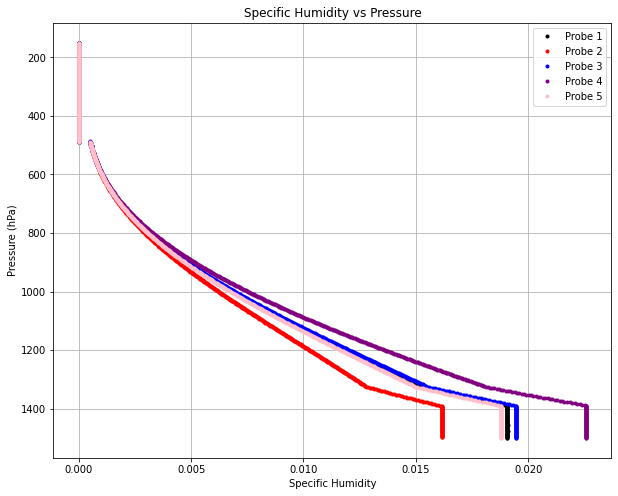

In [13]:
print(altitude[probe1[-80]])

plt.figure(figsize=(10, 8))
plt.plot(specific_humidity[probe1], pressure[probe1], '.', color='black', label='Probe 1')
plt.plot(specific_humidity[probe2[:-2]], pressure[probe2[:-2]], '.', color='red', label='Probe 2')
plt.plot(specific_humidity[probe3], pressure[probe3], '.', color='blue', label='Probe 3')
plt.plot(specific_humidity[probe4], pressure[probe4], '.', color='purple', label='Probe 4')
plt.plot(specific_humidity[probe5], pressure[probe5], '.', color='pink', label='Probe 5')
plt.xlabel('Specific Humidity')
plt.ylabel('Pressure (hPa)')
plt.title('Specific Humidity vs Pressure')
plt.gca().invert_yaxis()
plt.legend()
plt.grid()
plt.show()

In [14]:
absorbed_sw = 150  # W/m^2
latent_heat_fraction = 0.4
surface_latent_heat_flux = absorbed_sw * latent_heat_fraction  # W/m^2
global_mean_precipitation_rate = surface_latent_heat_flux / (L * 1000)  # m/s
global_mean_precipitation_rate_mm_per_hour = global_mean_precipitation_rate * 3600 * 1000  # mm/hour

print(f"Global-mean precipitation rate: {global_mean_precipitation_rate_mm_per_hour:.4f} mm/hour")

total_water_vapor_mass = np.sum(vapour_density) * np.pi * (6371e3)**2  # kg
precipitation_rate = global_mean_precipitation_rate * np.pi * (6371e3)**2  # kg/s
residence_time = total_water_vapor_mass / precipitation_rate  # s
residence_time_days = residence_time / (24 * 3600)  # days

print(f"Residence time of water in the atmosphere: {residence_time_days:.2f} Earth days")

Global-mean precipitation rate: 0.0960 mm/hour
Residence time of water in the atmosphere: 11889.24 Earth days


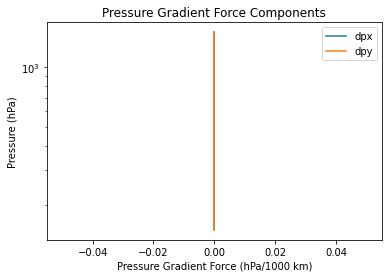

In [15]:
dpx = np.zeros_like(pressure)
dpy = np.zeros_like(pressure)

for i in range(len(probe1)):
    p = pressure[probe1][i]
    idx = np.where(pressure == p)[0]
   
    if len(idx) == 5:  # All probes have data at this pressure level
        z1 = altitude[idx[0]]
        z2 = altitude[idx[1]]
        z3 = altitude[idx[2]]
        z4 = altitude[idx[3]]
        z5 = altitude[idx[4]]
       
        dpx[probe1][i] = -g * (z3 - z1) / (2 * 500e3)  # hPa/(1000 km)
        dpy[probe1][i] = -g * (z4 - z2) / (2 * 500e3)  # hPa/(1000 km)

plt.figure()
plt.plot(dpx[probe1], pressure[probe1], label='dpx')
plt.plot(dpy[probe1], pressure[probe1], label='dpy')
plt.yscale('log')
plt.xlabel('Pressure Gradient Force (hPa/1000 km)')
plt.ylabel('Pressure (hPa)')
plt.title('Pressure Gradient Force Components')
plt.legend()
plt.show()

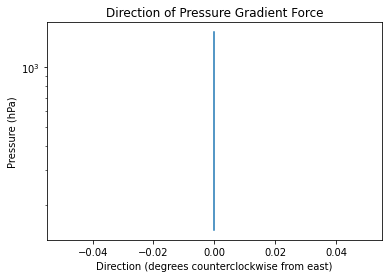

In [16]:
directions = np.arctan2(dpy[probe1], dpx[probe1]) * 180 / np.pi
directions[directions < 0] += 360  # Convert to range [0, 360)

plt.figure()
plt.plot(directions, pressure[probe1])
plt.yscale('log')
plt.xlabel('Direction (degrees counterclockwise from east)')
plt.ylabel('Pressure (hPa)')
plt.title('Direction of Pressure Gradient Force')
plt.show()

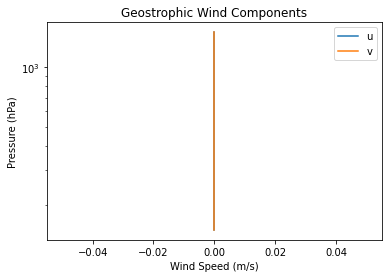

In [17]:
coriolis_parameter = 2 * 7.292e-5 * np.sin(np.radians(45))  # Assuming latitude of 45 degrees

u = -dpy[probe1] / (coriolis_parameter * air_density[probe1])
v = dpx[probe1] / (coriolis_parameter * air_density[probe1])

plt.figure()
plt.plot(u, pressure[probe1], label='u')
plt.plot(v, pressure[probe1], label='v')
plt.yscale('log')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Pressure (hPa)')
plt.title('Geostrophic Wind Components')
plt.legend()
plt.show()

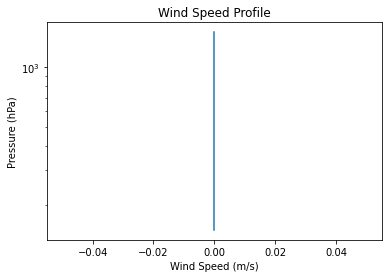

The peak of the jet occurs at a pressure of 150.00 hPa.


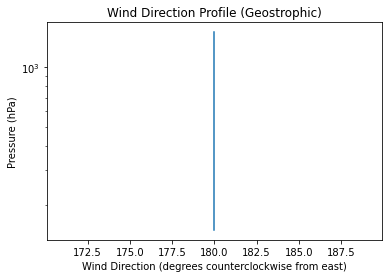

In [18]:
wind_speed = np.sqrt(u**2 + v**2)

plt.figure()
plt.plot(wind_speed, pressure[probe1])
plt.yscale('log')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Pressure (hPa)')
plt.title('Wind Speed Profile')
plt.show()

jet_peak_pressure = pressure[probe1][np.argmax(wind_speed)]
print(f'The peak of the jet occurs at a pressure of {jet_peak_pressure:.2f} hPa.')

# Question 1e
wind_direction = np.arctan2(v, u) * 180 / np.pi
wind_direction[wind_direction < 0] += 360  # Convert to range [0, 360)

plt.figure()
plt.plot(wind_direction, pressure[probe1])
plt.yscale('log')
plt.xlabel('Wind Direction (degrees counterclockwise from east)')
plt.ylabel('Pressure (hPa)')
plt.title('Wind Direction Profile (Geostrophic)')
plt.show()